In [1]:
# importar librerías 
import tensorflow as tf
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import cv2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

0

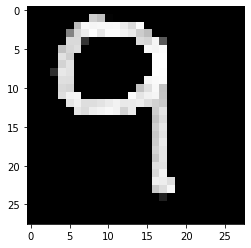

In [2]:
# Cargar imagen de prueba
i=0
f=0
label=[]
# Formato de imagen
imagenes_dataset = []
etiquetas_dataset = []
while(i<300):

  file = '/content/'+str(i)+'.png'
  test_image = cv2.imread(file, cv2.IMREAD_GRAYSCALE )
  img_resized = cv2.resize(test_image, (28,28), )
  img_resized = cv2.bitwise_not(img_resized)

  # Preview de imagen reformateada
  Numeros='/content/'+str(i)+'.png'
  plt.imshow(img_resized, cmap='gray')
  if(f==9):
    imagenes_dataset.append(img_resized)
    etiquetas_dataset.append(f)
    
    f=0
  else :
    imagenes_dataset.append(img_resized)
    etiquetas_dataset.append(f)
   
    f=f+1
  i=i+1

0

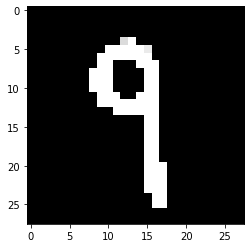

In [3]:
# para las test
i=300
f=0
imagenestest_dataset = []
etiquetastest_dataset = []
while(i<500):

  file = '/content/'+str(i)+'.png'
  test_image = cv2.imread(file, cv2.IMREAD_GRAYSCALE )
  img_resized = cv2.resize(test_image, (28,28), )
  img_resized = cv2.bitwise_not(img_resized)

  # Preview de imagen reformateada
  Numeros='/content/'+str(i)+'.png'
  plt.imshow(img_resized, cmap='gray')
  if(f==9):
    imagenestest_dataset.append(img_resized)
    etiquetastest_dataset.append(f)
    
    f=0
  else :
    imagenestest_dataset.append(img_resized)
    etiquetastest_dataset.append(f)
   
    f=f+1
  i=i+1


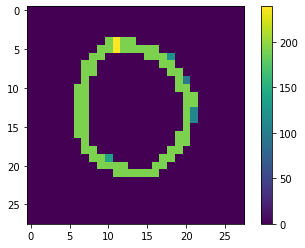

In [4]:
plt.figure()
plt.imshow(imagenes_dataset[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
len(etiquetas_dataset)

300

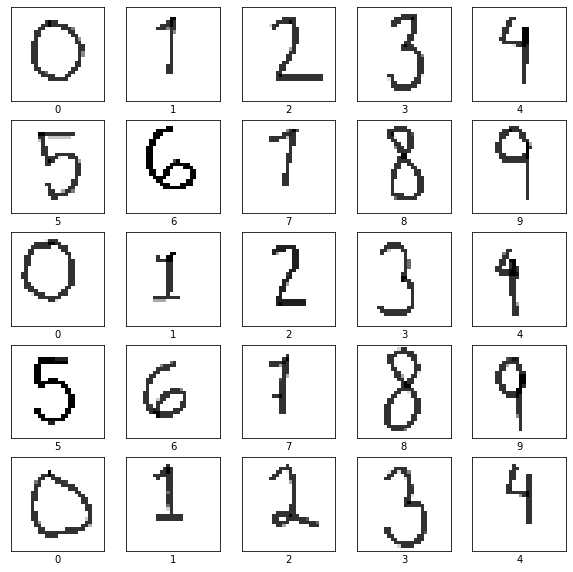

In [6]:
plt.figure(figsize=(10,10))
for j in range(25):
    plt.subplot(5,5,j+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imagenes_dataset[j], cmap=plt.cm.binary)
    plt.xlabel(etiquetas_dataset[j])
plt.show()

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:

newetiqueta=np.array(etiquetas_dataset)
newetiquetatest=np.array(etiquetastest_dataset)
imagenesne=np.array(imagenes_dataset)
imagenesnetest=np.array(imagenestest_dataset)


In [10]:
newetiqueta.shape

(300,)

In [11]:
imagenesne.shape

(300, 28, 28)

In [12]:
model.fit(imagenesne, newetiqueta, epochs=10)

Epoch 1/10
10/10 [==============================] - 1s 4ms/step - loss: 79.5716 - accuracy: 0.1633
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 19.2950 - accuracy: 0.5667
Epoch 3/10
10/10 [==============================] - 0s 2ms/step - loss: 8.8974 - accuracy: 0.7300
Epoch 4/10
10/10 [==============================] - 0s 2ms/step - loss: 2.9990 - accuracy: 0.8767
Epoch 5/10
10/10 [==============================] - 0s 5ms/step - loss: 1.2213 - accuracy: 0.9267
Epoch 6/10
10/10 [==============================] - 0s 4ms/step - loss: 0.4426 - accuracy: 0.9667
Epoch 7/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1700 - accuracy: 0.9800
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0651 - accuracy: 0.9900
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0065 - accuracy: 0.9967
Epoch 10/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000


In [13]:
test_loss, test_acc = model.evaluate(imagenesnetest, newetiquetatest, verbose=2)

print('\nTest accuracy:', test_acc)

7/7 - 0s - loss: 26.8470 - accuracy: 0.4850 - 185ms/epoch - 26ms/step

Test accuracy: 0.48500001430511475


In [14]:
predictions = model.predict(imagenesnetest)

7/7 [==============================] - 0s 2ms/step


In [15]:
predictions[0]

array([9.9999994e-01, 0.0000000e+00, 4.7594412e-24, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00], dtype=float32)

In [16]:
np.argmax(predictions[0])

0

In [17]:
newetiquetatest[0]

0

In [18]:
class_names=('0','1','2','3','4','5','6','7','8','9')

In [19]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

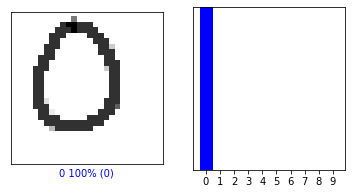

In [20]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], newetiquetatest, imagenesnetest)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  newetiquetatest)
plt.show()

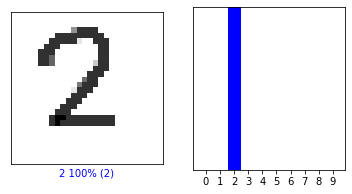

In [21]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], newetiquetatest, imagenesnetest)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  newetiquetatest)
plt.show()

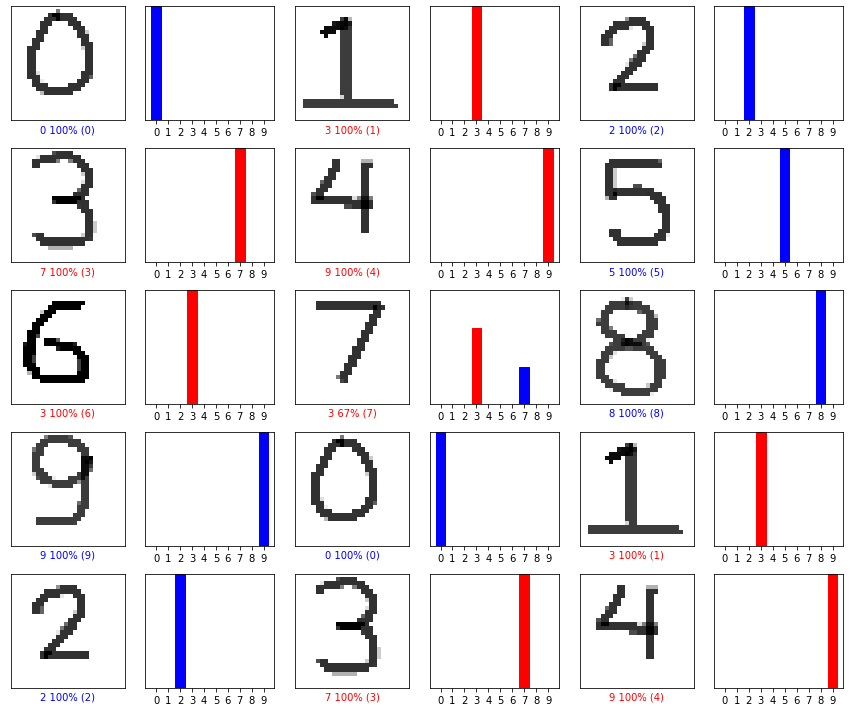

In [22]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], newetiquetatest, imagenesnetest)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], newetiquetatest)
plt.tight_layout()
plt.show()

In [23]:
img = imagenesnetest[1]

print(img.shape)

(28, 28)


In [24]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [25]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 23ms/step
[[2.5296316e-38 1.1415364e-20 0.0000000e+00 1.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 3.8738942e-36 0.0000000e+00 0.0000000e+00]]


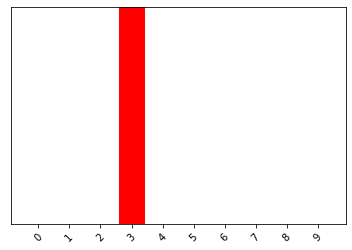

In [26]:
plot_value_array(1, predictions_single[0], newetiquetatest)
_ = plt.xticks(range(10), class_names, rotation=45)

In [27]:
np.argmax(predictions_single[0])

3